In [58]:
import pandas as pd
from plotnine import ggplot, geom_point, aes, geom_smooth, theme_bw, theme, element_text
import datetime

In [49]:
# Read CSV results into a dataframe
df = pd.read_csv(filepath_or_buffer="results-single-value-traits.csv", na_values="none")

In [44]:
# Convert the timestamp column to datetimes
df["timestamp"] = pd.to_datetime(df["timestamp"], utc=True)

In [41]:
# Inspect dataframe
df.head()

,camera,imgtype,zoom,exposure,gain,frame,lifter,timestamp,id,plantbarcode,...,perimeter,width,height,longest_path,convex_hull_vertices,object_in_frame,ellipse_major_axis,ellipse_minor_axis,ellipse_angle,ellipse_eccentricity
0,10.9.1.29,none,none,none,none,none,none,2019-10-24 22:00:00+00:00,pos-153-001-003,none,...,475.141658,75,97,997,25,True,91.558182,66.460716,11.494801,0.687816
1,10.9.1.29,none,none,none,none,none,none,2019-10-24 22:00:00+00:00,pos-153-001-003,none,...,340.977703,61,86,902,19,True,83.770531,48.906353,18.295277,0.811888
2,10.9.1.29,none,none,none,none,none,none,2019-10-24 22:00:00+00:00,pos-153-001-003,none,...,660.129825,140,79,925,19,True,125.202698,65.008461,86.238297,0.854637
3,10.9.1.29,none,none,none,none,none,none,2019-10-24 22:00:00+00:00,pos-153-001-003,none,...,533.656464,97,81,704,23,True,86.736191,66.451012,66.776833,0.642688
4,10.9.1.29,none,none,none,none,none,none,2019-10-24 22:00:00+00:00,pos-153-001-003,none,...,464.266444,82,83,1075,22,True,96.756912,56.722248,137.807861,0.810141


/Users/nfahlgren/opt/miniconda3/envs/plantcv/lib/python3.7/site-packages/plotnine/stats/smoothers.py:168: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  "for lowess smoothings.", PlotnineWarning)


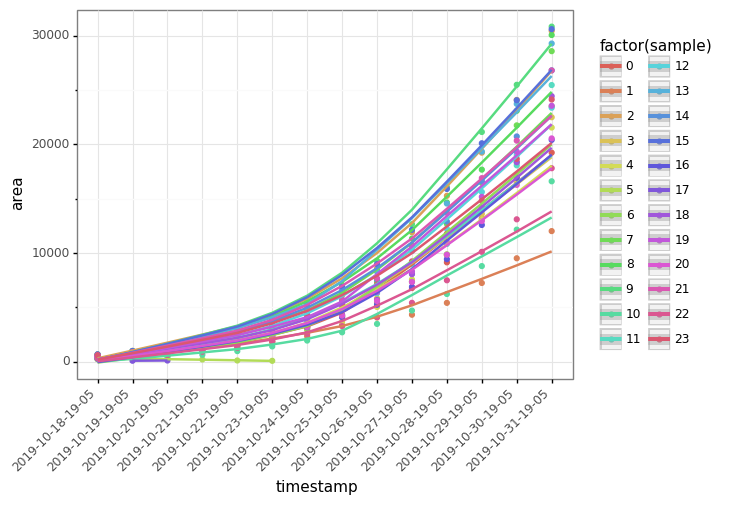

<ggplot: (8762644088041)>

In [61]:
# Plot the results as a scatterplot with a LOESS fit line
(ggplot(df, aes("timestamp", "area", color="factor(sample)", group="factor(sample)"))
    + geom_point()
    + geom_smooth(method="lowess")
    + theme_bw()
    + theme(axis_text_x=element_text(rotation=45, hjust=1)))